In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("28-urban_pedestrian_locations_with_labels.csv")

In [43]:
df.head()

,x_position,y_position,true_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_position    500 non-null    float64
 1   y_position    500 non-null    float64
 2   true_cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


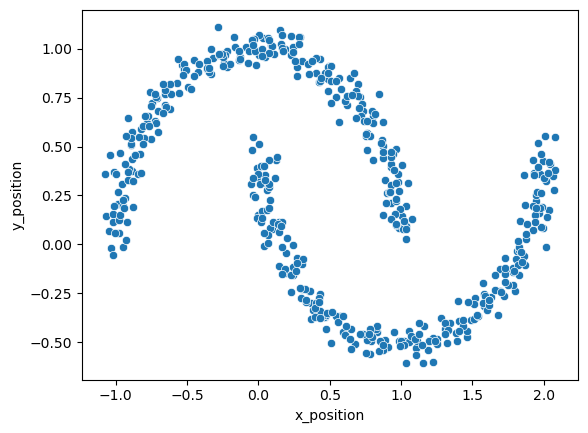

In [45]:
sns.scatterplot(df, x="x_position",y="y_position")
plt.show()

In [46]:
df = df.drop("true_cluster",axis=1)

In [47]:
df

,x_position,y_position
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_scaled = scaler.fit_transform(df)

In [50]:
from sklearn.cluster import DBSCAN

In [51]:
dbscan = DBSCAN()

In [52]:
dbscan.fit(X_scaled)

DBSCAN()

In [53]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [54]:
X_scaled = pd.DataFrame(X_scaled, columns=["x_position", "y_position"])

In [55]:
X_scaled

,x_position,y_position
0,0.375125,-1.403679
1,0.226815,1.135628
2,0.595442,-1.493710
3,-0.944918,1.409748
4,-0.243115,1.618062
...,...,...
495,-0.304636,1.474047
496,-0.497472,-0.133542
497,0.098642,-1.238718
498,1.282741,-1.074231


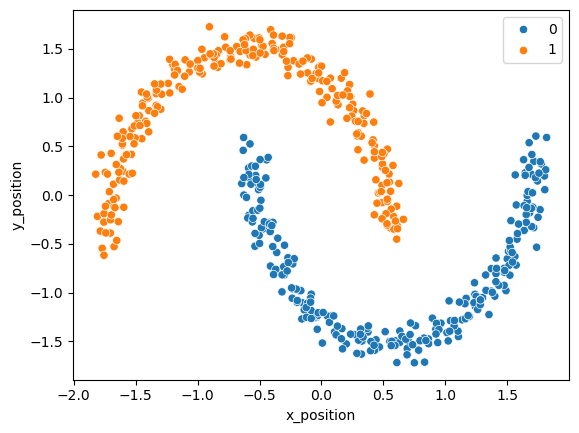

In [56]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=dbscan.labels_)
plt.show()

In [74]:
# Hyperparameter grids
eps_values = [0.1,0.2,0.3,0.4,0.5,0.6]
min_samples_values = [4,5,6]

In [76]:
from sklearn.metrics import silhouette_score

In [78]:
# Store results
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        # Skip if all points are noise or only one cluster found
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X_scaled, labels)
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        })

# Convert to DataFrame and sort by silhouette 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [80]:
results_df

,eps,min_samples,Silhouette,n_clusters
4,0.2,5,0.389338,2
3,0.2,4,0.389338,2
14,0.5,6,0.389338,2
11,0.4,6,0.389338,2
5,0.2,6,0.389338,2
6,0.3,4,0.389338,2
8,0.3,6,0.389338,2
7,0.3,5,0.389338,2
9,0.4,4,0.389338,2
10,0.4,5,0.389338,2


In [82]:
from sklearn.cluster import HDBSCAN

In [84]:
hdbscan = HDBSCAN()

In [86]:
hdbscan.fit(X_scaled)

HDBSCAN()

In [88]:

hdbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

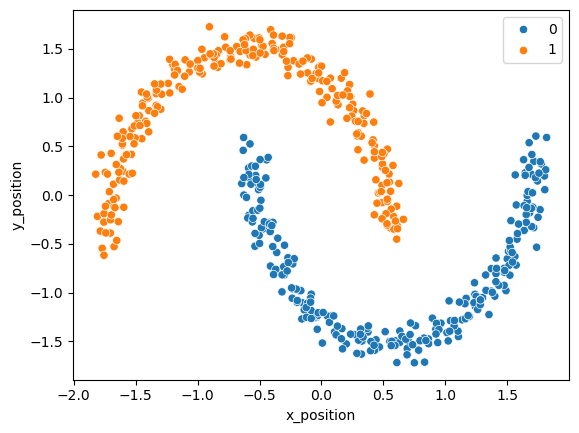

In [90]:
sns.scatterplot(data=X_scaled, x="x_position", y="y_position", hue=hdbscan.labels_)
plt.show()

In [92]:
min_cluster_sizes = [3, 5, 7, 10]
min_samples = [None, 3, 5, 7]

In [94]:
results = []

for min_cluster in min_cluster_sizes:
    for min_sample in min_samples:
        hdb = HDBSCAN(min_cluster_size=min_cluster, min_samples=min_sample).fit(X_scaled)
        labels = hdb.labels_
        # Skip if all points are noise or only one cluster found
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X_scaled, labels)
        
        results.append({
            'min_cluster_size': min_cluster,
            'min_samples': min_sample,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0)
        })

# Convert to DataFrame and sort by silhouette 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [96]:
results_df

,min_cluster_size,min_samples,Silhouette,n_clusters
3,3,7.0,0.389338,2
2,3,5.0,0.389338,2
5,5,3.0,0.389338,2
4,5,NaN,0.389338,2
6,5,5.0,0.389338,2
7,5,7.0,0.389338,2
9,7,3.0,0.389338,2
8,7,NaN,0.389338,2
12,10,NaN,0.389338,2
13,10,3.0,0.389338,2
